In [16]:
!wget https://pjreddie.com/media/files/yolov3.weights

--2019-09-09 18:47:08--  https://pjreddie.com/media/files/yolov3.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 248007048 (237M) [application/octet-stream]
Saving to: ‘yolov3.weights’

yolov3.weights      100%[===================>] 236.52M  1006KB/s    in 3m 0s   

2019-09-09 18:50:08 (1.32 MB/s) - ‘yolov3.weights’ saved [248007048/248007048]



In [3]:
!wget https://pjreddie.com/media/files/yolov3-tiny.weights

--2019-09-09 12:32:52--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M   187KB/s    in 77s     

2019-09-09 12:34:10 (448 KB/s) - ‘yolov3-tiny.weights’ saved [35434956/35434956]



In [8]:
!wget https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg

--2019-09-09 12:56:43--  https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/yolov3.cfg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8342 (8.1K) [text/plain]
Saving to: ‘yolov3.cfg’

yolov3.cfg          100%[===================>]   8.15K  --.-KB/s    in 0s      

2019-09-09 12:56:43 (132 MB/s) - ‘yolov3.cfg’ saved [8342/8342]



In [5]:
!wget https://github.com/pjreddie/darknet/blob/master/data/coco.names

--2019-09-09 12:47:38--  https://github.com/pjreddie/darknet/blob/master/data/coco.names
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘coco.names’

coco.names              [ <=>                ]  80.82K  --.-KB/s    in 0.03s   

2019-09-09 12:47:38 (3.10 MB/s) - ‘coco.names’ saved [82760]



In [0]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [0]:
#net = cv2.dnn.readNet("yolov3-tiny.weights", "yolov3-tiny.cfg")
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
  classes = [line.strip() for line in f.readlines()]
layers_names = net.getLayerNames()
output_layers = [layers_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [0]:
    # Loading image
    img = cv2.imread("vz4xc03o3Zs.jpg")
    img = cv2.resize(img, None, fx=0.4, fy=0.4)
    height, width, channels = img.shape

In [0]:
    # Detecting objects
    blob = cv2.dnn.blobFromImage(img, 0.00392, (416, 416), (0, 0, 0), True, crop=False)
    net.setInput(blob)
    outs = net.forward(output_layers)

In [0]:
#print(outs)

In [0]:
    # Showing informations on the screen
    class_ids = []
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            class_id = np.argmax(scores)
            confidence = scores[class_id]
            if confidence > 0.3:
                # Object detected
                #print("detected")
                center_x = int(detection[0] * width)
                center_y = int(detection[1] * height)
                w = int(detection[2] * width)
                h = int(detection[3] * height)
                # Rectangle coordinates
                x = int(center_x - w / 2)
                y = int(center_y - h / 2)
                boxes.append([x, y, w, h])
                confidences.append(float(confidence))
                class_ids.append(class_id)

In [0]:
#print(outs)

In [0]:
    indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.05, 0.05)

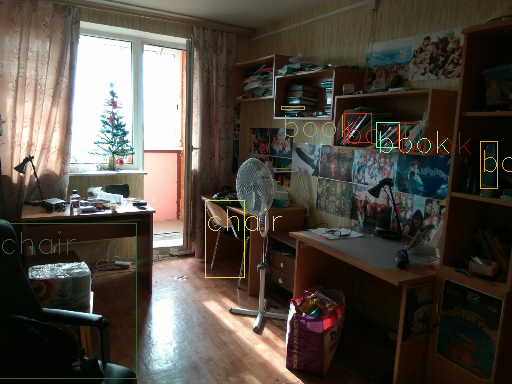

In [116]:
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = (width * height) / (1000 * 1000)
    img = cv2.imread("vz4xc03o3Zs.jpg")
    img = cv2.resize(img, None, fx=0.4, fy=0.4)

    for i in range(len(boxes)):
        if i in indexes:
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]])
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 1)
            cv2.putText(img, label, (x, y + 30), font, 1, color, 1)
    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()